# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**


2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

###Theoretical proofs

****  
**1. Proof:** 


*   $R_k$ is uppertriangular $\Rightarrow$ $R_k^{-1}$ is uppertriangular. 
*   $A_k = Q_k R_k  \Rightarrow Q_k = R_k^{-1} A_k$, i.e. $Q_k$ is a product of uppertriangular matrix $R_k^{-1}$ and upper Hessenberg matrix $A_k \Rightarrow Q_k$ is an upper Hessenberg matrix.
*   Consequently, $A_{k+1} = R_kQ_k$ is an upper Hessenberg matrix again as product of uppertriangular matrix $R_k$ and upper Hessenberg matrix $Q_k$.

The proof is based on two facts, let us proof them.

1)  $R$ is uppertriangular $\Rightarrow$ $R^{-1}$ is uppertriangular.

Consider $R R^{-1} = I$ or equvivalently in column form: $R\left[\tilde{r}_1\left|\tilde{r}_2\right| \ldots \mid \tilde{r}_n\right] = \left[R\tilde{r}_1\left|R\tilde{r}_2\right| \ldots \mid R\tilde{r}_n\right] = \left[e_1\left|e_2\right| \ldots \mid e_n\right] \Rightarrow R\tilde{r}_k = e_k$ for all $k=\overline{1,n}$


\begin{equation}
R\tilde{r}_k =
\left[\begin{array}{ccccccc}
* & * & * & \cdots & * & * \\ 
0 & * & * & \cdots & * & * \\ 
0 & 0 & * & \cdots & * & * \\ 
. & . & . & \cdots & . & . \\ 
0 & 0 & 0 & \cdots & R_{n-1, n-1} & R_{n-1, n} \\ 
0 & 0 & 0 & \cdots & 0 & R_{nn} \\ 
\end{array}\right] 
\left[\begin{array}{c}
\tilde{r}_k^1 \\
\tilde{r}_k^2 \\
\vdots \\
\tilde{r}_k^{n-1} \\
\tilde{r}_k^n
\end{array}\right]
=
\left[\begin{array}{c}
0 \\
0 \\
1 \\
\vdots \\
0 \\
0
\end{array}\right]
=e_k
\end{equation}

The last row contains only one non-zero element $R_{nn} \neq 0$ and multipling it by a column vector gives 0: $R_{n n} \cdot \tilde{r}_k^n=0 \Rightarrow \tilde{r}_k^n=0$.

Similarly, 
\begin{equation}
R_{n-1 n-1} \cdot \tilde{r}_k^{n-1}+R_{n-1 n}  \cdot \tilde{r}_k^n=R_{n-1 n-1} \cdot \tilde{r}_k^{n-1}=0 \Rightarrow \tilde{r}_k^{n-1}=0
\end{equation}

and moving from the bottom to the $k$-th position we got that $\tilde{r}_k$ has zeroes below k. It holds for all $k=\overline{1,n}  \Rightarrow R^{-1} = \left[\tilde{r}_1\left|\tilde{r}_2\right| \ldots \mid \tilde{r}_n\right]$ is uppertriangular.

2) $C$ is uppertriangular, $D$ is Hessenberg $\Rightarrow F=CD$ is Hessenberg

In index notation:
\begin{equation}
F_{i j}=\sum_{\alpha=1}^{n} C_{i \alpha} D_{\alpha j}
\end{equation}

Since  $D$ is Hessenberg, $D_{\alpha j} = 0$ for $\alpha > j + 1 \Rightarrow$ 

\begin{equation}
F_{i j}=\sum_{\substack{\alpha: \\ \alpha<j+1}} C_{i \alpha} D_{\alpha j}
\end{equation}

Consider the elements $F_{ij}$ below the first subdiagonal $(i > j + 1)$. For them 
\begin{equation}
F_{i j}=\sum_{\substack{\alpha: \\ \alpha< j + 1<i}} C_{i \alpha} D_{\alpha j} 
=\sum_{\substack{\alpha: \\ \alpha<i}} C_{i \alpha} D_{\alpha j} = 0
\end{equation}

since $C_{i \alpha} = 0$ for $i > \alpha$  because it is an uppertriangular matrix.
Therefore, $F_{ij} = 0$ for $i > j + 1$ meaning that $F$ is upper Hessenberg. 

****   

In [ ]:
import numpy as np

In [ ]:
def Hessenberg_Transform(A):
    H = A
    n = A.shape[0]
    Q = np.eye(n)
    for i in range(1, n-1):
        v = get_householder(H[i:, i-1])
        v = v.reshape(-1, 1)

        v_norm = v.T @ v
        if np.isclose(v_norm, 0):
            V = np.eye(v.shape[0])
        else:
            V = np.eye(v.shape[0]) - 2 / v_norm * v @ v.T

        U = np.block([
        [np.eye(i), np.zeros((i, n-i))],
        [np.zeros((n-i, i)), V] 
        ]) 

        H = U @ H @ U.T

        Q = Q @ U

    H = np.where(np.abs(H) < 1e-13, 0, H)
    Q = np.where(np.abs(Q) < 1e-13, 0, Q)
    return H, Q


def get_householder(vector):
    e = np.zeros_like(vector)
    e[0] = 1.0
    if np.isclose(vector[0], 0, atol=1e-10):
        return np.linalg.norm(vector, ord=2) * e + vector
    else:
        return np.linalg.norm(vector, ord=2) * e - np.sign(vector[0]) * vector 

In [ ]:
def QR_givens(H):
    n = H.shape[0]
    Q, R = np.eye(n), H
    for i in range(0, n-1):

        if np.isclose(R[i+1, i], 0):
            continue

        s = 1.0 / np.sqrt(R[i,i]*R[i,i] / (R[i+1, i]*R[i+1, i]) + 1)
        c = s * R[i, i] / R[i+1, i]
        G = np.eye(n)
        G[i, i], G[i, i+1] = c, s
        G[i+1, i], G[i+1, i+1] = -s, c


        Q = Q @ G.T
        R = G @ R

    R = np.where(np.abs(R) < 1e-13, 0, R)
    Q = np.where(np.abs(Q) < 1e-13, 0, Q)
    return Q, R

In [ ]:
def QR_algorithm(A, N_iterations):
    H = A
    H, _ = Hessenberg_Transform(H)
    for _ in range(0, N_iterations):
        Q, R = QR_givens(H)
        H = R @ Q

    H = np.where(np.abs(H) < 1e-13, 0, H)
    return H

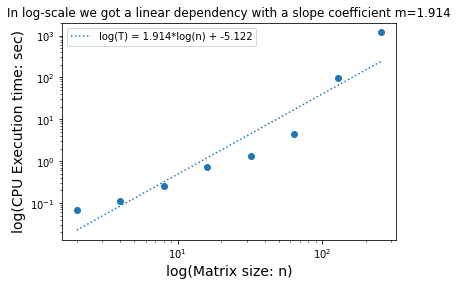

In [ ]:
import matplotlib.pyplot as plt
import time

ns = np.around(np.geomspace(2, 256, num=8)).astype(int)
ts = []
N_iterations = 1000
for n in ns:
    A = np.random.rand(n, n) 
    A = (A + A.T) / 2.0 # Let us check only on matrices with a real spectrum

    st = time.process_time()
    QR_algorithm(A, N_iterations)
    t = time.process_time() - st

    ts.append(t)


plt.scatter(ns, ts)

m, c = np.polyfit(np.log(ns), np.log(ts), 1) # fit log(y) = m*log(x) + c
y_fit = np.exp(m*np.log(ns) + c)
plt.plot(ns, y_fit, ':', label=f'log(T) = {m:.3f}*log(n) + {c:.3f}')

plt.xlabel("log(Matrix size: n)", fontsize=14)
plt.ylabel("log(CPU Execution time: sec)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title(f'In log-scale we got a linear dependency with a slope coefficient m={m:.3f}')
plt.legend();

**Comment:** instead of $O(Nn^3)$ complexity of the standard QR-algorithm we got 
complexity $O(Nn^2)$. 

On the initialization stage we obtained Hessenberg form of the matrix (as it was mentioned, initialization stage does not influence the complexity), and then on each of $N$ steps we zeroed out only the first lower subdiagonal ($n-1$ element) with Givens rotations $O(n^2)$ 

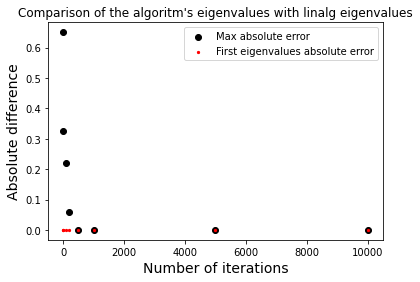

In [ ]:
N_iters = [5, 10, 100, 200, 500, 1000, 5000, 10000]
n = 20

abs_errors = []
largest_eigenval_abs_errors = []

A = np.random.rand(n, n)
A = (A + A.T) / 2.0

linalg_eigvals = np.linalg.eigvals(A)
linalg_eigvals = np.sort(linalg_eigvals)[::-1]

for N_iter in N_iters:
    H = QR_algorithm(A, N_iter)
    algorithm_eigvals = np.sort(H.diagonal())[::-1]
    
    largest_eigenval_abs_errors.append(algorithm_eigvals[0] - linalg_eigvals[0])
    abs_errors.append(np.abs(algorithm_eigvals - linalg_eigvals).max())

plt.scatter(N_iters, abs_errors, color='black', label='Max absolute error')
plt.scatter(N_iters, largest_eigenval_abs_errors, color='red', s=5, label='First eigenvalues absolute error')
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Absolute difference", fontsize=14)
plt.title("Comparison of the algoritm's eigenvalues with linalg eigenvalues")
plt.legend();

**Comment**:
The number of iterations $N$ required for eigenvalues from proposed algorithm  converge to the linalg eigeinvalues depends on the matrix, the more the better in terms of absolute difference. For $N=10000$ it is coinsides with absolute error $\sim 10^{-14}$.

However, even $N=10$ steps of the algorithm are enough to get a good estimation of the largest eigenvalue.


# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

**Proof:** $u^{\top}Bu$ is a scalar $\Rightarrow u^{\top}Bu = \operatorname{tr} \left( u^{\top}Bu \right) = \operatorname{tr} \left( Bu u^{\top}\right) $. Therefore $ \mathbb{E}\left[u^\top B u\right] = \mathbb{E}\left[ \operatorname{tr} \left( Buu^{\top} \right)\right]  $. Due to linearity of expectation and the fact that trace is a linear combination of matrix entries: $\mathbb{E}\left[ \operatorname{tr} \left( Buu^{\top} \right)\right]  =  \operatorname{tr} \left( \mathbb{E} \left[Buu^{\top}\right] \right) $. 
$B$ is a matrix of constants, so $ \mathbb{E} \left[Buu^{\top}\right] = B \cdot \mathbb{E} \left[uu^{\top}\right]$
All $u_i$ are i.i.d random variables with $ \mathbb{E}u_i = 0$ and $\operatorname{Var} u_i = \sigma^2$, so
\begin{equation} \mathbb{E}\left[u^\top B u\right] = \operatorname{tr} \left( B \cdot \mathbb{E} \left[uu^{\top}\right] \right)= 
\operatorname{tr}\left(B \cdot\left(\begin{array}{cccc}
\mathbb{E}\left[u_1 u_1\right] & \mathbb{E}\left[u_1 u_2\right] & \cdots & \mathbb{E}\left[u_1 u_n\right] \\
\mathbb{E}\left[u_2 u_1\right] & \mathbb{E}\left[u_2 u_2\right] & \cdots & \mathbb{E}\left[u_2 u_n\right] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{E}\left[u_n u_1\right] & \mathbb{E}\left[u_n u_2\right] & \cdots & \mathbb{E}\left[u_n u_n\right]
\end{array}\right)\right)= \\
\operatorname{tr}\left(B \cdot\left(\begin{array}{cccc}
\mathbb{E}\left[u_1^2\right] & \mathbb{E}\left[u_1\right] \mathbb{E}\left[u_2\right] & \cdots & \mathbb{E}\left[u_1\right] \mathbb{E}\left[ u_n\right] \\
\mathbb{E}\left[u_2\right] \mathbb{E}\left[ u_1\right] & \mathbb{E}\left[u_2^2\right] & \cdots & \mathbb{E}\left[u_2\right] \mathbb{E}\left[ u_n\right] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{E}\left[u_n\right] \mathbb{E}\left[ u_1\right] & \mathbb{E}\left[u_n\right] \mathbb{E}\left[ u_2\right] & \cdots & \mathbb{E}\left[u_n^2\right]
\end{array}\right)\right)= \\
\operatorname{tr}\left(B
\left(\begin{array}{cccc}
\operatorname{Var} u_1-\left(\mathbb{E} u_1\right)^2 & 0 & \ldots & 0 \\
0 & \operatorname{Var}\left(u_2\right)-\left(\mathbb{E} u_2\right)^2 & \ldots & 0 \\
\vdots & \vdots & \ddots &\vdots  \\
0 & 0 & \ldots &\operatorname{Var}\left(u_n\right)-\left(\mathbb{E} u_n\right)^2
\end{array}\right) \right) = \\
\operatorname{tr}\left(B \cdot \operatorname{diag}\left(\sigma^2-0, \sigma^2-0, \ldots, \sigma^2-0\right)\right)=\sigma^2 \operatorname{tr} B
\end{equation}

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

**Solution:**

a. For normal distribution $\mathbb{E}u^4 = \sigma^4 (4 - 1)!! = 3\sigma^4 \Rightarrow$  $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + 2\sigma^4\sum_{i}B_{ii}^2 = 2 \sigma^4 \| B \|_F^2$

b. If $u$ is a Rademacher distributed random variable, then the random variable $u^4$ takes only one value $(-1)^4 = 1^4 = 1$, therefore $\mathbb{E}u^4 = 1 \Rightarrow 
\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 = 2 \left(\| B \|_F^2  - \sum_i B_{ii}^2\right)$.


4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

**Solution:**

a. $\mathbb{E}\left[\hat{\mu}\right] = \mathbb{E} \left[\frac{1}{N}\sum_{i=1}^{N} z_{i} \right] = \frac{1}{N}\sum_{i=1}^{N} \mathbb{E} \left[z_{i} \right] =\frac{1}{N}\sum_{i=1}^{N} \mu = \mu $

$\operatorname{Var}[\hat{\mu}]=\frac{1}{N^2} \sum_{i=1}^N \operatorname{Var}\left[z_i\right]=\frac{N \sigma^2}{N^2}=\frac{\sigma^2}{N}$

b. Probability of the estimate $\hat{\mu}$ deviate from $\mu$ on $\varepsilon$ is given by:
\begin{aligned}
\operatorname{Pr}(|\hat{\mu}-\mu|<\varepsilon) 
& =1-\operatorname{Pr}(|\hat{\mu}-\mu| \geqslant \varepsilon) \\
& =1-\operatorname{Pr}\left(\mid \hat{\mu}-\mu \mid \geqslant \varepsilon \sqrt{\frac{N}{\sigma^2}} \sqrt{\frac{\sigma^2}{N}} \right)= \\
& =1-\operatorname{Pr}\left(|\hat{\mu}-\mathbb{E}[\mu]| \geqslant \varepsilon \sqrt{\frac{N}{\sigma^2}} \cdot \sqrt{\operatorname{Var}[\mu]}\right) \geqslant \\
& \geqslant 1-\frac{1}{k^2}   = 1 - \delta
\end{aligned}

where $ k=\frac{\varepsilon\sqrt{N}}{\sigma} = \frac{1}{\sqrt{\delta}}$ by Chebyshev inequality. In other words for $N \geqslant \frac{\sigma^2}{\varepsilon^2 \delta }$ we can guarantee that $\operatorname{Pr}(|\hat{\mu}-\mu|<\varepsilon)$ is high. For example, for $\operatorname{Pr}(|\hat{\mu}-\mu|<\varepsilon) = \frac{9}{10}, \delta = \frac{1}{10}$ and $N \geqslant \frac{10\sigma^2}{\varepsilon ^2}$.


5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.


**Solution:** 
For  Rademacher distribution $\sigma^2_{z_k} = 2 \left(\| B \|_F^2  - \sum_i B_{ii}^2\right)$ therefore $N = \frac{\sigma^2}{\varepsilon^2 \delta } = \frac{2 \left(\| B \|_F^2  - \sum_i B_{ii}^2\right)}{\varepsilon^2 \delta }$. 

For normal distribution $\sigma^2_{z_k} = 2 \sigma^4 \| B \|_F^2$ therefore $N = \frac{2 \sigma^4 \| B \|_F^2}{\varepsilon^2 \delta }$.


  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

In [ ]:
import numpy as np
from scipy.linalg import circulant

def get_variances(B, sigma, N_draw):
    var_by_formula = 2 * sigma**4 * (np.sum(B * B))

    ksi = np.zeros(N_draw)
    for i in range(N_draw):
        u = np.random.normal(0.0, sigma, B.shape[0])
        ksi[i] = u.T @ B @ u
    var = np.var(ksi)
    return var_by_formula, var

N_draw = 1000
sigma = 4.0

B1 = np.array([[1, 1, 1, 1],
              [1, 1, 1, 1],
              [1, 1, 1, 1], 
              [1, 1, 1, 1]])

B2 = np.array([[0, 1000, 0, 0],
               [0, 0, 10, 0],
               [100, 0, 0, 0], 
               [0, 1, 0, 0]])

B3 = circulant([1, 20, 300])
B4 = circulant([1, 20, 3000])

Bs = [B1, B2, B3, B4]

for B in Bs:
    var_by_formula, var = get_variances(B, sigma, N_draw)
    print(f'B = \n{B}')
    print(f'Estimated variance vs. Theoretical variance : {var:.3f} vs. {var_by_formula}')
    print(f'Relative difference = {(np.abs(var - var_by_formula) / var_by_formula):.3f}')

B = 
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
Estimated variance vs. Theoretical variance : 7599.032 vs. 8192.0
Relative difference = 0.072
B = 
[[   0 1000    0    0]
 [   0    0   10    0]
 [ 100    0    0    0]
 [   0    1    0    0]]
Estimated variance vs. Theoretical variance : 257351510.748 vs. 517171712.0
Relative difference = 0.502
B = 
[[  1 300  20]
 [ 20   1 300]
 [300  20   1]]
Estimated variance vs. Theoretical variance : 73643883.940 vs. 138855936.0
Relative difference = 0.470
B = 
[[   1 3000   20]
 [  20    1 3000]
 [3000   20    1]]
Estimated variance vs. Theoretical variance : 8759487607.469 vs. 13824615936.0
Relative difference = 0.366


  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

**Comment:**
If $\delta$ is small this result means that $N \approx \frac{1}{\varepsilon^2}$ of matrix-vector multiplications is needed to estimate trace of a matrix A with precision $\varepsilon$.

**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [ ]:
import numpy as np

def Hutchinson_algorithm(B, N, normal_distribution=True):
    trace_estimate = 0
    for i in range(N): 
        if normal_distribution:
            u = np.random.normal(0.0, 1.0, B.shape[0])
        else: 
            u = np.random.binomial(size=B.shape[0], n=1, p=0.5)
            u = np.where(u == 0, -1, 1)
        trace_estimate += u.T @ B @ u
    return trace_estimate / N

2. Evaluate your algorithm on several matrices on your choice.

In [ ]:
epsilon = 0.1
N = int(1.0 / epsilon**2)
print('N = ', N)

B = np.random.rand(3000, 3000)
print(f'Real value {np.trace(B):.3f}')
print(f'Estimation {Hutchinson_algorithm(B, N, normal_distribution=True)} (Normal distribution)')
print(f'Estimation {Hutchinson_algorithm(B, N, normal_distribution=False):.3f} (Rademacher distribution)')

N =  99
Real value 1495.538
Estimation 1386.5756964689147 (Normal distribution)
Estimation 1734.391 (Rademacher distribution)


In [ ]:
epsilon = 0.1
N = int(1.0 / epsilon**2)
print('N = ', N)

B = np.ones((300, 300))
B[0, -1] = -10
B[-1, 0] = -10
print(f'Real value {np.trace(B):.3f}')
print(f'Estimation {Hutchinson_algorithm(B, N, normal_distribution=True)} (Normal distribution)')
print(f'Estimation {Hutchinson_algorithm(B, N, normal_distribution=False):.3f} (Rademacher distribution)')

N =  99
Real value 300.000
Estimation 316.4531295640869 (Normal distribution)
Estimation 321.596 (Rademacher distribution)


**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

\begin{equation}
\frac{1}{N}\left(u^{\top} A u\right)=\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^N A_{i j} u_i u_j=\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^N u_i u_j =\frac{1}{N}\left(u_1+\ldots+u_N\right)^2=\left(\frac{u_1+\ldots+u_N}{\sqrt{N}}\right)^2
\end{equation}
Random variable $\xi = \frac{u_1}{\sqrt{N}} + \cdots \frac{u_N}{\sqrt{N}}$ has distribution $\mathcal{N}(\frac{0 \cdot N}{\sqrt{N}}, \frac{1 \cdot N}{N}) = \mathcal{N}(0, 1)$ as sum of $N$ i.i.d normal random variables $\frac{u_i}{\sqrt{N}}$ with mean 0 and variance 1. Therefore random variable $X = \xi^2 = u^{\top} A u \big/ N$ has chi-squared distribution with 1 degree of freedom, or $X \sim \chi^2_1$.

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

Random variable $\zeta = \sum_{i=1}^{M}u_i^\top A u_i \big/ N = \sum_{i=1}^{M}X_i $ is a sum of $M$ independent chi-squared distributed random variables $X_i \sim \chi^2_1$. Therefore $\zeta \sim \chi^2_{1 + 1 \cdots + 1} = \chi^2_{M}$ due to additivity of chi-squared distribution.

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{N}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

$G_M \sim \chi^2_M$ with $\mathbb{E}G_M = M$ and $\operatorname{Var}G_M = 2M$. For large $M$ it is almost normally distributed, therefore the cumulative distribution function $F_{G_M}(x)=\mathrm{P}(G_M \leq x)$ is the integral $\Phi\left(\frac{x-\mu}{\sigma}\right)=\frac{1}{2}\left[1+\operatorname{erf}\left(\frac{x-\mu}{\sigma \sqrt{2}}\right)\right] = \frac{1}{2}\left[1+\operatorname{erf}\left(\frac{x-M}{2\sqrt{M}}\right)\right]$, where $\operatorname{erf}(x)=\frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} d t$.

\begin{aligned}
\operatorname{Pr}\left(\left|G_M-N \right|< N \varepsilon \right) &= 
\operatorname{Pr}\left(N-N \varepsilon< G_M< N+N \varepsilon\right) \\ &
= F_{G_M}(N + N\varepsilon ) - F_{G_M}( N -  N\varepsilon ) = \\ &
= \frac{1}{2}\operatorname{erf}\left(\frac{N + N\varepsilon -M}{2\sqrt{M}}\right) - \frac{1}{2}\operatorname{erf}\left(\frac{N - N\varepsilon -M}{2\sqrt{M}}\right) = \\ & 
= \frac{1}{\sqrt{\pi}} \int_0^{\frac{N + N\varepsilon -M}{2\sqrt{M}}} e^{-t^2} d t - \frac{1}{\sqrt{\pi}} \int_0^{\frac{N - N\varepsilon -M}{2\sqrt{M}}} e^{-t^2} d t \\ &
= \frac{1}{\sqrt{\pi}} \int_{\frac{N - N\varepsilon -M}{2\sqrt{M}}}^{\frac{N + N\varepsilon -M}{2\sqrt{M}}} e^{-t^2} d t 
\end{aligned}

For matrix $A_{ij} = 1$ trace is equal to $N$ therefore, we can rewrite expression above:

\begin{aligned}
\operatorname{Pr}\left(\left|G_M - \operatorname{tr}A \right|<  \varepsilon \operatorname{tr}A \right) 
= \frac{1}{\sqrt{\pi}} \int_{\frac{N - N\varepsilon -M}{2\sqrt{M}}}^{\frac{N + N\varepsilon -M}{2\sqrt{M}}} e^{-t^2} d t 
\end{aligned}

Qualitatively, when number of trials $M$ is close to matrix size $N$ $\left( M \rightarrow N \right)$ the probability that $G_M$ is *very* (in a sense of the relative error $ \varepsilon \rightarrow 0$) close to $\operatorname{tr} A$ goes to zero (lower and upper bounds of the integral go to $\pm \frac{N \varepsilon}{2 \sqrt{M}} \rightarrow 0$).

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.




**Solution:**

\begin{aligned}
\operatorname{tr}\left(\left(I-Q Q^{\top}\right) A\left(I-Q Q^{\top}\right)\right) & =  \operatorname{tr}\left(A-A Q Q^{\top}-QQ^{\top} A+QQ^{\top} A Q Q^{\top}\right) = 
\\ & =
\operatorname{tr}(A)-\operatorname{tr}\left(A Q Q^{\top}\right)-\operatorname{tr}\left(Q Q^{\top} A\right)+\operatorname{tr}\left(QQ^{\top} A Q Q^{\top}\right)
\\ & =
\operatorname{tr}(A)-\operatorname{tr}\left(A Q Q^{\top}\right)-\operatorname{tr}\left(A Q Q^{\top}\right)+\operatorname{tr}\left(A Q Q^{\top} QQ^{\top} \right)
\\ & =
\operatorname{tr}(A)-\operatorname{tr}\left(A Q Q^{\top}\right)-\operatorname{tr}\left(A Q Q^{\top}\right)+\operatorname{tr}\left(A Q I_{k \times k}Q^{\top} \right)
\\ & =
\operatorname{tr}(A)-\operatorname{tr}\left(A Q Q^{\top}\right)
\end{aligned}

Here we used 1) linearity of the trace operator, 2) cyclic property of the trace operator and 3) the fact that $k-$top eigenvectors are orthonormal.

Therefore  $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

**Solution:**
\begin{aligned} 
\|A\|_F=\sqrt{\operatorname{tr}\left(A^{\top} A\right)}
& =\sqrt{\operatorname{tr}\left(U \Lambda U^{\top} U \Lambda U^{\top}\right)} \\
& =\sqrt{\operatorname{tr}\left(\Lambda U^{\top} U \Lambda U^{\top}U\right)}= \\
& =\sqrt{\operatorname{tr}\left(\Lambda^2\right)}= \\
& =\sqrt{\lambda_1^2+\ldots+\lambda_n^2} \leqslant \\ 
& \leqslant \sqrt{\left(\lambda_1^2+\ldots+\lambda_n^2 \right)+ \lambda_1\lambda_2 + \ldots + \lambda_1\lambda_n + \ldots + \lambda_{n-1}\lambda_1 + \ldots \lambda_{n-1}\lambda_n} \\
& =\sqrt{\left(\lambda_1+\ldots+\lambda_n \right)^2}= \operatorname{tr} \left(A\right)
\end{aligned}

Here we used 1) spectral decomposition $A = U \Lambda U^{\top}$ for symmetric positive definite matrix $A$, 2) cyclic property of trace operator, 3) $U U^{\top} = U^{\top} U = I$ for unitary matrices, 4) $\Lambda$ is a diagonal matrix with eigenvalues of A, 5) all eigenvalues are positive, so we can add terms $\lambda_i \lambda_j > 0$ to make it squared sum of $\lambda_i $.

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [ ]:
def improved_Hutchinson_algorithm(A, m):
    Q = np.random.binomial(size=(A.shape[0], m // 3), n=1, p=0.5)
    Q = np.where(Q == 0, -1, 1)
    # Get orthonormal basis for columns of AQ
    Q, _ = np.linalg.qr(A @ Q)
    # Compute trace exactly (2*m//3 matvecs)
    tr_1 = np.trace(Q.T @ A @ Q)
    # Approximate with Hutchinson algorithm (m//3 matvecs)
    F = np.eye(Q.shape[0], Q.shape[0]) - Q @ Q.T
    tr_2 = Hutchinson_algorithm(F @ A @ F, m // 3, normal_distribution=False)
    return tr_1 + tr_2

2. Evaluate you algorithm on several matrices on your choice.

In [ ]:
A = np.array([[1, 1, 1, 0.01],
              [1, 1, 1, 1],
              [1, 1, 1, 1], 
              [100, 1, 1, 1]])
m = 3
print(f'Real value {np.trace(A):.3f}')
print(f'Estimation {improved_Hutchinson_algorithm(A, m)}')

Real value 4.000
Estimation 5.76810518898882


In [ ]:
B = np.random.rand(3000, 3000)
m = 30
print(f'Real value {np.trace(B):.3f}')
print(f'Estimation {improved_Hutchinson_algorithm(B, m)}')

Real value 1496.772
Estimation 1415.9343399985587


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choice. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

In [ ]:
from scipy.sparse import random
A = random(4000, 4000, density=0.25)
A = (A + A.T) / 2
A = A.A

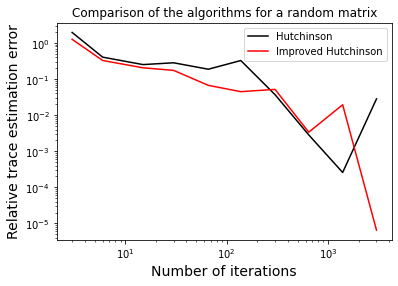

In [ ]:
import matplotlib.pyplot as plt

rel_err = []
rel_err_improved = []

Ns_matvec_products = 3 * np.around(np.geomspace(1, 1000, num=10)).astype(int)

for N_matvec_products in Ns_matvec_products:
    trace_estimate = Hutchinson_algorithm(A, N_matvec_products, normal_distribution=False)
    trace_estimate_improved = improved_Hutchinson_algorithm(A, N_matvec_products)
    trace = np.trace(A)

    rel_err.append(np.abs(trace_estimate - trace) / trace)
    rel_err_improved.append(np.abs(trace_estimate_improved - trace) / trace)


plt.plot(Ns_matvec_products, rel_err, color='black', label='Hutchinson')
plt.plot(Ns_matvec_products, rel_err_improved, color='red',  label='Improved Hutchinson')
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Relative trace estimation error", fontsize=14)
plt.title("Comparison of the algorithms for a random matrix")
plt.xscale('log')
plt.yscale('log')
plt.legend();

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

In [ ]:
n_dim = 4000
alpha = -3.0
A = np.random.uniform(size=(n_dim, n_dim))
U, _, Vt = np.linalg.svd(A.T @ A)
W_squared = np.diag(np.power(np.arange(1, n_dim+1, 1), alpha))
B = np.transpose(U @ np.sqrt(W_squared) @ Vt) @ (U @ np.sqrt(W_squared) @ Vt)
# Now matrix B is symmetric positive definite with spectrum given by W_squared

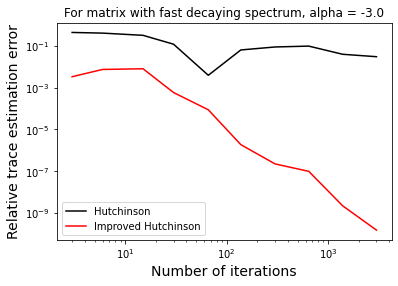

In [ ]:
import matplotlib.pyplot as plt

rel_err = []
rel_err_improved = []

Ns_matvec_products = 3 * np.around(np.geomspace(1, 1000, num=10)).astype(int)

for N_matvec_products in Ns_matvec_products:
    trace_estimate = Hutchinson_algorithm(B, N_matvec_products, normal_distribution=False)
    trace_estimate_improved = improved_Hutchinson_algorithm(B, N_matvec_products)
    trace = np.trace(B) # = W_squared.sum()

    rel_err.append(np.abs(trace_estimate - trace) / trace)
    rel_err_improved.append(np.abs(trace_estimate_improved - trace) / trace)


plt.plot(Ns_matvec_products, rel_err, color='black', label='Hutchinson')
plt.plot(Ns_matvec_products, rel_err_improved, color='red', label='Improved Hutchinson')
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Relative trace estimation error", fontsize=14)
plt.title(f"For matrix with fast decaying spectrum, alpha = {alpha}")
plt.xscale('log')
plt.yscale('log')
plt.legend();

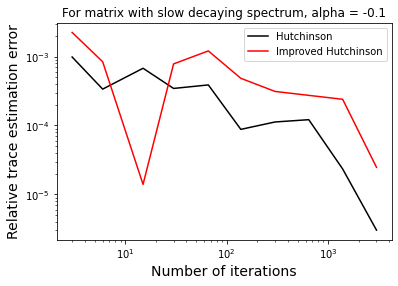

In [ ]:
n_dim = 4000
alpha = -0.1
A = np.random.uniform(size=(n_dim, n_dim))
U, _, Vt = np.linalg.svd(A.T @ A)
W_squared = np.diag(np.power(np.arange(1, n_dim+1, 1), alpha))
B = np.transpose(U @ np.sqrt(W_squared) @ Vt) @ (U @ np.sqrt(W_squared) @ Vt)
# Now matrix B is symmetric positive definite with spectrum given by W_squared

rel_err = []
rel_err_improved = []

Ns_matvec_products = 3 * np.around(np.geomspace(1, 1000, num=10)).astype(int)

for N_matvec_products in Ns_matvec_products:
    trace_estimate = Hutchinson_algorithm(B, N_matvec_products, normal_distribution=False)
    trace_estimate_improved = improved_Hutchinson_algorithm(B, N_matvec_products)
    trace = np.trace(B) # = W_squared.sum()

    rel_err.append(np.abs(trace_estimate - trace) / trace)
    rel_err_improved.append(np.abs(trace_estimate_improved - trace) / trace)


plt.plot(Ns_matvec_products, rel_err, color='black', label='Hutchinson')
plt.plot(Ns_matvec_products, rel_err_improved, color='red', label='Improved Hutchinson')
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Relative trace estimation error", fontsize=14)
plt.title(f"For matrix with slow decaying spectrum, alpha = {alpha}")
plt.xscale('log')
plt.yscale('log')
plt.legend();

3. Summarize your observations.

**Solution:** For random sparse matrices the difference between Hutchinson and improved Hutchinson algorithm is insignificant: the same number of matvecs gives the same precision. 

For matrices with a fast decaying spectrum, the improved algorithm performs much better, but for matrices with a slow decaying spectrum the Hutchinson algorithm leads (on a logarithmic scale, the smaller the relative error line, the better).

Indeed, in improved Hutchinson algorithm the error only comes from approximating the trace of 'the spectrum tail', and in case of slow decaying spectrum this error will be high. In case of the fast decaying spectrum we get a good approximation of the trace by exact computations its top eigenvectors.


# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



**Solution:**
Let us stack all images in batch vertically and denote it as $X$: 
$$X = \left[\begin{array}{c}
x_1 \\
\vdots \\
x_{\text{batch_size}}
\end{array}\right]$$
$J_i(x)$ is a Jacobian matrix of the $i$-th hidden layer w.r.t. given image $x$, so let us denote vertically stacked Jacobians for given batch as $J_i\left( X\right)$ so that in this notation we have a matrix

$$ J_i\left( X\right) \varepsilon = \left[\begin{array}{c}
J_i\left(x_1\right) \varepsilon\\
\cdots \\
J_i\left(x_{\text{batch_size}}\right) \varepsilon
\end{array}\right] $$

Now we can rewrite the initial optimization problem $$\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q$$ 
as 
$$\max _{\|\varepsilon\|_p=1}\left\|J_i(X) \varepsilon\right\|_q^q $$ 
which is in turn equivalent to 
$$ \max _{\|\varepsilon\|_p=1}\left\|J_i(X) \varepsilon\right\|_q = \max _{\varepsilon} \frac{\left\|J_i(x) \varepsilon\right\|_q}{\|\varepsilon\|_p}$$

First order optimality condition (for simplicity we denoted $J_i(X)$ as $A$):
$$\frac{\partial}{\partial \varepsilon_k} \left( \frac{\|A \varepsilon\|_{q}}{\|\varepsilon\|_p} \right) = 
\frac{\|\varepsilon\|_p}{\|\varepsilon\|_p^2} \cdot \frac{\partial}{\partial \varepsilon_k}\left(\|A \varepsilon\|_q\right)-\frac{\|A \varepsilon\|_q}{\|\varepsilon\|_p^2} \frac{\partial}{\partial \varepsilon_k}\left(\|\varepsilon\|_p\right) = 0 $$

For the first term:
\begin{aligned}
\frac{\partial}{\partial \varepsilon_k}\left(\|A \varepsilon\|_q\right) =
& \frac{\partial}{\partial \varepsilon_k}\left(\sum_i\left|\sum_j A_{i j} \varepsilon_j\right|^q\right)^{\frac{1}{q}}= \\
& =\frac{1}{q}\left(\left\|A \varepsilon\right\|_q\right)^{q \cdot\left(\frac{1}{q}-1\right)} \cdot \sum_i \frac{\partial}{\partial \varepsilon_k}\left(\left|\sum_j A_{i j} \varepsilon_j\right|^q \right)= \\
& =\frac{1}{q}\left\|A \varepsilon\right\|_q^{1-q} \cdot \sum_i q \cdot\left|\sum_j A_{i j} \varepsilon_j\right|^{q-1} \cdot \frac{\partial}{\partial \varepsilon_k}\left|\sum_j A_{i j} \varepsilon_j\right|= \\
& =\left\|A \varepsilon\right\|_q^{1-q} \cdot \sum_i \cdot\left|\sum_j A_{i j} \varepsilon_j\right|^{q-1} \cdot \operatorname{sign} \left( \sum_j A_{i j} \varepsilon_j\right) \sum_j A_{i j} \delta_{jk}= \\
& =\left\|A \varepsilon\right\|_q^{1-q} \cdot \sum_i \cdot\left|\sum_j A_{i j} \varepsilon_j\right|^{q-1} \cdot \operatorname{sign} \left( \sum_j A_{i j} \varepsilon_j\right) A_{ik}
\end{aligned}

For the second:
\begin{equation}
\frac{\partial}{\partial \varepsilon_k}\|\varepsilon\|_p
=\frac{1}{p}\|\varepsilon\|_p^{p\left(\frac{1}{p}-1\right)} \cdot \sum_i p\left|\varepsilon_i\right|^{p-1} \operatorname{sign}\left(\varepsilon_i\right) \delta_{i k}=\|\varepsilon\|_p^{1-p} \cdot\left|\varepsilon_k\right|^{p-1} \operatorname{sign} \varepsilon_k
\end{equation}

Getting it all together:
$$\|\varepsilon\|_p \cdot\left\|A\varepsilon\right\|_q^{1-q} \sum_i\left|\sum_j A_{i j} \varepsilon_j\right|^{q-1} \cdot \operatorname{sign}\left(\sum_j A_{i j} \varepsilon_j\right) \cdot A_{i k}= \|A \varepsilon\|_q \cdot\|\varepsilon\|_p^{1-p}\left|\varepsilon_k\right|^{p-1} \operatorname{sign} \varepsilon_k$$

$$\|A \varepsilon\|_q^{-q} \cdot\|\varepsilon\|_p^p \cdot \sum_i A_{k i}^{\top}\left|\sum_j A_{i j} \varepsilon_j\right|^{q-1} \cdot \operatorname{sign}\left(\sum_j A_{i j} \varepsilon_j\right) = \operatorname{sign} \varepsilon_k \left|\varepsilon_k\right|^{p-1}$$

Let's introduce the function of the derivative of modulus in $p$-th power: $\psi_p(x)=\operatorname{sign} x|x|^{p-1}$. For vector it it applied elementwise, so the first order optimality condition is 
$$\|A \varepsilon\|_q^{-q} \cdot\|\varepsilon\|_p^p \cdot A^{\top} \psi_q \left(A\varepsilon \right) = \psi_p(\varepsilon)$$

Let's apply $\psi_{p^{\prime}}(\cdot)$ to both sides, where $p^{\prime}$ is so that $\left(p-1\right)(p^{\prime} - 1)=1$

Right hand side will transform just to $\varepsilon$, indeed

$$\psi_{p^{\prime}}\left(\psi_p(\varepsilon)\right)=\psi_{p^{\prime}}\left(\operatorname{sign} \varepsilon|\varepsilon|^{p-1}\right)= |\operatorname{sign} \varepsilon|^{ p^{\prime}-1 }\cdot|\varepsilon|^{\left(p-1\right)(p^{\prime} - 1)} \cdot \operatorname{sign}\left(\operatorname{sign} \varepsilon |\varepsilon|^{p-1}\right) = 1 \cdot|\varepsilon| \cdot \operatorname{sign}\varepsilon=\varepsilon$$

Finally, $\varepsilon=\psi_{p^{\prime}}\left( \|A \varepsilon\|_q^{-q} \cdot\|\varepsilon\|_p^p \cdot A^{\top} \psi_q \left(A\varepsilon \right) \right)= \|A \varepsilon\|_q^{-q (p^{\prime} - 1 )} \cdot \| \varepsilon\|_p^{p(p^{\prime} - 1 )} \cdot \psi_{p^{\prime}}\left(A^{\top} \psi_q \left(A\varepsilon \right) \right)$.

Fixed point iteration is then: $\varepsilon_{k+1}=\left\|J_i(X) \varepsilon_k\right\|_q^{-q\left(p^{\prime}-1\right)} \cdot \psi_{p^{\prime}}\left(J_i^{\top}(X) \psi_q(J_i(X) \varepsilon)\right), \quad \varepsilon_{k+1}=\frac{\varepsilon_{k+1}}{\|\varepsilon_{k+1}\|} $ 


For obtaining sparse $\varepsilon$, i.e. vector $\varepsilon$ with less than $k$ non-zero elements, we can just zero out all entries except the top-$k$ ones at each iteration, and then normalize the vector $\varepsilon_{k+1}$.



In [ ]:
import torch
import torch.nn as nn
import requests

In [ ]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

In [ ]:
!pip install functorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.notebook import tqdm
from torch.autograd.functional import jacobian
from functorch import vmap, jacfwd
import matplotlib.pyplot as plt
import numpy as np
from torch import autograd

# functions to show an image
def imshow(img):
    plt.figure(figsize=(4,2))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def Calc_Gradient(z):
    model.eval()
    compute_batch_jacobian = vmap(jacfwd(model))
    grads = compute_batch_jacobian(z)
    return grads.reshape(-1, 32 * 32 * 3)


def truncate(x, k):
    # Take indeces of top k values
    topk_indeces = np.argsort(np.abs(x), axis=-1)[-k:] 
    # Leave top values of k, zeroing all the others
    truncated_x = np.zeros(x.shape) 
    truncated_x[topk_indeces] = x[topk_indeces]  
    return truncated_x


def psi(p, x): return np.sign(x) * (np.abs(x) ** (p - 1.0))


def power_method(A, q, p, k):
    # Initialize with some random vector ||eps||_p = 1
    p_prime = p / (p - 1)
    eps = np.random.rand(A.shape[-1])
    eps /= np.linalg.norm(eps, ord=p)
    A_eps = np.linalg.norm(A @ eps, ord=q)
    for i in range(5):
        eps = psi(p_prime, A.T @ psi(q, A @ eps)) * (np.linalg.norm(eps, ord=p) ** (p * (p_prime - 1)))
        eps *= A_eps ** (-q * (p_prime - 1))
        eps = truncate(eps, k)
        A_eps = np.linalg.norm(A @ eps, ord=q)
        eps /= np.linalg.norm(eps, ord=p)
    return eps


def get_epsilon(batch, model, q, p, k): 
    #p, q - norms, k - sparsity
    J = Calc_Gradient(batch.to(device))
    J = J.detach().cpu().numpy()
    epsilon = power_method(J, q, p, k)
    return epsilon

def fooling_rate_upd(epsilon, model):  
    fools = 0
    total = 0
    with torch.no_grad():
        model.eval()
        flag = 1
        for data in tqdm(trainloader):
            batch, labels = data
            outputs = model(batch.to(device))
            _, predicted = torch.max(outputs, 1)

            attacked_batch = batch + torch.tensor(epsilon.reshape(3, 32, 32))
            attacked_batch = attacked_batch.to(torch.float)
            attacked_outputs = model(attacked_batch.to(device))
            _, attacked_predicted = torch.max(attacked_outputs, 1)

            total += labels.size(0)
            fools += (attacked_predicted != predicted).sum().item()


            # show some images where the model was fooled
            if (attacked_predicted != predicted).sum().item() > 0 and flag > 0:
                imshow(torchvision.utils.make_grid(batch))
                imshow(torchvision.utils.make_grid(attacked_batch))
                # print labels
                print('Groundtruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
                # print predictions
                print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))
                # print predictions
                print('Attacked Predicted: ', ' '.join(f'{classes[attacked_predicted[j]]:5s}' for j in range(batch_size)))
                flag = 0

    print(f'Fool rate: {100 * fools // total} %')

Files already downloaded and verified


  0%|          | 0/25000 [00:00<?, ?it/s]

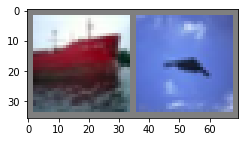

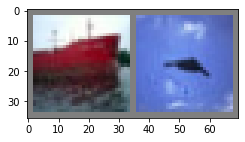

Groundtruth:  ship  plane
Predicted:  ship  plane
Attacked Predicted:  truck plane
Fool rate: 6 %


In [ ]:
import torchvision
import torchvision.transforms as transforms



transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

dataiter = iter(trainloader)
batch, _ = next(dataiter)
epsilon = get_epsilon(batch, model, 2, 2, 0)
fooling_rate_upd(epsilon, model)

**Comment:** the preturbed layer is the last one. My implementation clearly is not efficient, so that the maximal batch_size is equal to 4)) 
Foolrate 6% but it is not so bad given that for it creation only 4 images out of the 50000 trainset were used

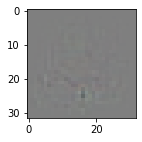

In [ ]:
# how pertrubation does look like
imshow(torchvision.utils.make_grid(torch.tensor(epsilon.reshape(3, 32, 32)))) 

# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g+\alpha_1u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [ ]:
from PIL import Image, ImageOps

In [ ]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"

--2022-12-11 20:32:20--  https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/oseledets/nla2022/raw/main/hw2/lena.png [following]
--2022-12-11 20:32:20--  https://github.com/oseledets/nla2022/raw/main/hw2/lena.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png [following]
--2022-12-11 20:32:20--  https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203

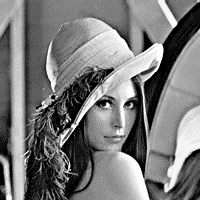

In [ ]:
orig_image = ImageOps.grayscale(Image.open("/lena.png"))
orig_image